# Sales Predictions for a Grocery Outlet Chain

In [1]:
# Mount our Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
# Import (we can add more later below should we choose to employ a different method to evaluate the data)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [48]:
# Load our Dataset
filename = '/content/drive/MyDrive/DS-CodingDojoColab/Project1/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Exploratory Data Analysis

In [ ]:
# Let's begin exploring what we're working with!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Deal with Missing Values

Sources I used to help in figuring out my data manipulation and analysis: 

---



https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/

In [ ]:
# The dtypes all appear correct, so we'll just have to do something with the null (missing) values in 2 of the columns

In [ ]:
# Starting with the Item Weight column
df['Item_Weight'].isna().value_counts()

False    7060
True     1463
Name: Item_Weight, dtype: int64

In [ ]:
missing_values = df.loc[df['Item_Weight'].isna() == True]
missing_values.head()
# Given that about 20% of the values are missing, it would be presumptuous to try to impute values into the missing rows.
# Looking the column info in the data head shows me that perhaps each item's weight is irrelevant (or has very little impact) to the sales predictions.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [ ]:
# Probably the best idea is just to drop the column altogether.
df.drop("Item_Weight", axis=1, inplace=True)
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.shape

(8523, 11)

In [ ]:
# Now we have to consider what to do with the missing Outlet_Size values
df['Outlet_Size'].isnull().value_counts()

False    6113
True     2410
Name: Outlet_Size, dtype: int64

In [ ]:
# So we now know there are 2,410 missing values in this column-- Let's look at the non-null value counts now
df['Outlet_Size'].value_counts()

Medium    2793
Large     2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
# Let's re-verify now that all the null values are gone, and the "Item Weight" column has been removed.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 732.6+ KB


In [ ]:
#The result above is strange... Small, Medium and High? Usually there would also be "Large" with Small and Medium.
# We will infer that the 2,410 missing Outlet Size values were intended to be "Large" and impute them
df['Outlet_Size'].fillna("Large", inplace=True)
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Large,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Visualizations

In [ ]:
# Now we're ready for some visualizations! Let's see what types of foods we are working with!
item_count = df['Item_Type'].value_counts()
item_count

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
item_count.values

array([1232, 1200,  910,  856,  682,  649,  648,  520,  445,  425,  251,
        214,  169,  148,  110,   64])

In [ ]:
item_count.index

Index(['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods',
       'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Soft Drinks',
       'Meat', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods', 'Breakfast',
       'Seafood'],
      dtype='object')

Text(0, 0.5, 'Number of Items Sold')

<Figure size 432x288 with 0 Axes>

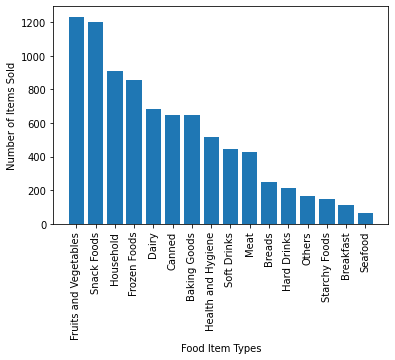

In [ ]:
plt.figure()
fig, ax = plt.subplots(nrows = 1, ncols = 1);
ax.bar(item_count.index, item_count.values);
plt.xticks(rotation=90)
plt.tight_layout
plt.xlabel('Food Item Types')
plt.ylabel('Number of Items Sold')
# Looks like Fruits/Vegetables and Snack Foods are the 2 categories with the highest per-item sales.  Makes sense.

Text(0, 0.5, 'Gross Items Sold')

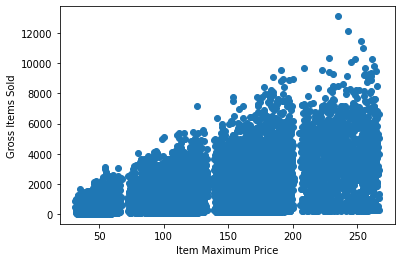

In [ ]:
# Let's look at the relationship between item price and number of sales with a scatter plot
plt.scatter(df['Item_MRP'],df['Item_Outlet_Sales'])
plt.xlabel('Item Maximum Price')
plt.ylabel('Gross Items Sold')
# Trend indicates that the higher an item's price, the more of that item is sold. Interesting.

## Histograms & Boxplots

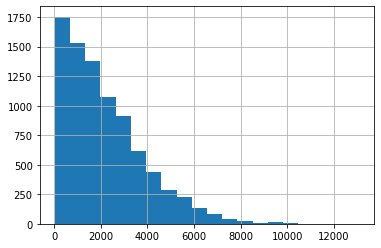

In [ ]:
# A little hard to read too much into the histogram plot here
df["Item_Outlet_Sales"].hist(bins=20)

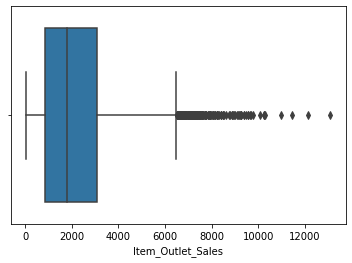

In [ ]:
# This is easier to see, looks like the median sales of all items is a little under 2,000 per outlet, with a handful of outliers we could also see on the scatter plot.
sns.boxplot(x = df["Item_Outlet_Sales"]);

## Modeling with Linear Regression


We want to start simple evaluation by creating a linear regression model with the few numeric categories we have.

In [19]:
X = df.loc[:, ['Item_Visibility', 
               'Item_MRP',
               'Outlet_Establishment_Year']]

In [20]:
X.shape

(8523, 3)

In [21]:
# target vector
y = df.loc[:, 'Item_Outlet_Sales'].values

In [22]:
y.shape

(8523,)

In [23]:
# Make a linear regression instance
reg = LinearRegression(fit_intercept=True)

In [24]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
preds = reg.predict(X)

In [26]:
# Coefficient of Determination/R2:
# Using the model:
reg.score(X, y)

0.34230383956563726

In [ ]:
# Using sklearn:
from sklearn.metrics import r2_score
r2_score(y, preds)

0.34230383956563726

In [ ]:
# Yikes, not very good. 34%
# We need to deal with the categorical variables in our data now, so that we can incorporate more features

## Categorical Variables

In [127]:
#Pandas get_dummies
ohe = pd.get_dummies(df, columns = ['Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size','Outlet_Location_Type', 'Outlet_Type'], drop_first=True)
ohe.head()

,Item_Identifier,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Visibility_0.003574698,Item_Visibility_0.003589104,Item_Visibility_0.003597678,Item_Visibility_0.003599378,Item_Visibility_0.0036067259999999998,Item_Visibility_0.003612411,Item_Visibility_0.005209791,Item_Visibility_0.005230785999999999,Item_Visibility_0.005234153,Item_Visibility_0.005235143,Item_Visibility_0.005243281999999999,Item_Visibility_0.005264755,Item_Visibility_0.005448005,Item_Visibility_0.00547348,Item_Visibility_0.005474515,Item_Visibility_0.005485618,Item_Visibility_0.005496816,Item_Visibility_0.005505481,Item_Visibility_0.005525913,Item_Visibility_0.00552947,Item_Visibility_0.005530516,Item_Visibility_0.005539114,Item_Visibility_0.005547386,Item_Visibility_0.005557062,Item_Visibility_0.005561538,Item_Visibility_0.005561798000000001,Item_Visibility_0.005583951,Item_Visibility_0.005611367,Item_Visibility_0.005620213000000001,Item_Visibility_0.005638944,Item_Visibility_0.005661669,...,Item_Visibility_0.304859104,Item_Visibility_0.305305397,Item_Visibility_0.30654284800000003,Item_Visibility_0.308145448,Item_Visibility_0.309390255,Item_Visibility_0.311090379,Item_Visibility_0.32111501,Item_Visibility_0.325780807,Item_Visibility_0.328390948,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,249.8092,1999,3735.1380,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
1,DRC01,5.92,48.2692,2009,443.4228,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
2,FDN15,17.50,141.6180,1999,2097.2700,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
3,FDX07,19.20,182.0950,1998,732.3800,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,NCD19,8.93,53.8614,1987,994.7052,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [128]:
ohe['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDV60     9
DRN47     9
FDT07     9
         ..
FDE52     1
DRF48     1
FDY43     1
FDN52     1
FDK57     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [129]:
# Since there are 1559 different "Item Identifier" values, that is going to lead to complication in our ML model.  We'll drop it for now
ohe = ohe.drop(columns = 'Item_Identifier')
ohe.head()

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Visibility_0.003574698,Item_Visibility_0.003589104,Item_Visibility_0.003597678,Item_Visibility_0.003599378,Item_Visibility_0.0036067259999999998,Item_Visibility_0.003612411,Item_Visibility_0.005209791,Item_Visibility_0.005230785999999999,Item_Visibility_0.005234153,Item_Visibility_0.005235143,Item_Visibility_0.005243281999999999,Item_Visibility_0.005264755,Item_Visibility_0.005448005,Item_Visibility_0.00547348,Item_Visibility_0.005474515,Item_Visibility_0.005485618,Item_Visibility_0.005496816,Item_Visibility_0.005505481,Item_Visibility_0.005525913,Item_Visibility_0.00552947,Item_Visibility_0.005530516,Item_Visibility_0.005539114,Item_Visibility_0.005547386,Item_Visibility_0.005557062,Item_Visibility_0.005561538,Item_Visibility_0.005561798000000001,Item_Visibility_0.005583951,Item_Visibility_0.005611367,Item_Visibility_0.005620213000000001,Item_Visibility_0.005638944,Item_Visibility_0.005661669,Item_Visibility_0.005677876,...,Item_Visibility_0.304859104,Item_Visibility_0.305305397,Item_Visibility_0.30654284800000003,Item_Visibility_0.308145448,Item_Visibility_0.309390255,Item_Visibility_0.311090379,Item_Visibility_0.32111501,Item_Visibility_0.325780807,Item_Visibility_0.328390948,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,249.8092,1999,3735.1380,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
1,5.92,48.2692,2009,443.4228,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
2,17.50,141.6180,1999,2097.2700,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
3,19.20,182.0950,1998,732.3800,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,8.93,53.8614,1987,994.7052,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [130]:
ohe.isna().sum()

Item_Weight                      1463
Item_MRP                            0
Outlet_Establishment_Year           0
Item_Outlet_Sales                   0
Item_Fat_Content_Low Fat            0
                                 ... 
Outlet_Location_Type_Tier 2         0
Outlet_Location_Type_Tier 3         0
Outlet_Type_Supermarket Type1       0
Outlet_Type_Supermarket Type2       0
Outlet_Type_Supermarket Type3       0
Length: 7918, dtype: int64

In [131]:
# Somehow my Item_Weight column made it's way back in with null values, let's drop again
ohe.drop("Item_Weight", axis=1, inplace=True)
ohe.head()

,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Visibility_0.003574698,Item_Visibility_0.003589104,Item_Visibility_0.003597678,Item_Visibility_0.003599378,Item_Visibility_0.0036067259999999998,Item_Visibility_0.003612411,Item_Visibility_0.005209791,Item_Visibility_0.005230785999999999,Item_Visibility_0.005234153,Item_Visibility_0.005235143,Item_Visibility_0.005243281999999999,Item_Visibility_0.005264755,Item_Visibility_0.005448005,Item_Visibility_0.00547348,Item_Visibility_0.005474515,Item_Visibility_0.005485618,Item_Visibility_0.005496816,Item_Visibility_0.005505481,Item_Visibility_0.005525913,Item_Visibility_0.00552947,Item_Visibility_0.005530516,Item_Visibility_0.005539114,Item_Visibility_0.005547386,Item_Visibility_0.005557062,Item_Visibility_0.005561538,Item_Visibility_0.005561798000000001,Item_Visibility_0.005583951,Item_Visibility_0.005611367,Item_Visibility_0.005620213000000001,Item_Visibility_0.005638944,Item_Visibility_0.005661669,Item_Visibility_0.005677876,Item_Visibility_0.005935001,...,Item_Visibility_0.304859104,Item_Visibility_0.305305397,Item_Visibility_0.30654284800000003,Item_Visibility_0.308145448,Item_Visibility_0.309390255,Item_Visibility_0.311090379,Item_Visibility_0.32111501,Item_Visibility_0.325780807,Item_Visibility_0.328390948,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,249.8092,1999,3735.1380,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
1,48.2692,2009,443.4228,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
2,141.6180,1999,2097.2700,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
3,182.0950,1998,732.3800,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,53.8614,1987,994.7052,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [132]:
# We need to import some other methods to evaluate the data
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split

## Linear Regression after OHE and with Train-Test-Split

In [135]:
# Arrange data into features matrix & target vector
X = ohe.drop(columns='Item_Outlet_Sales')
y = ohe['Item_Outlet_Sales']

In [103]:
lr = LinearRegression(fit_intercept=True)

In [104]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [105]:
lr_tts = LinearRegression()
lr_tts.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
# training R2
lr_tts.score(X_train, y_train)

0.9658940340396445

In [107]:
# testing R2
lr_tts.score(X_test, y_test)

0.5561509640793683

In [108]:
# Getting better, 96.5% on training data! But only 55.6% on testing data, so our model is overfit here.
# Let's try KNN

## KNN without train-test-split

In [109]:
# Standardize data
scaler = StandardScaler()
# Fit on X (assuming your features matrix is a NumPy array)
scaler.fit(X)
# Transform X
X_scaled = scaler.transform(X);

In [110]:
# KNN - Regressor
knn = KNeighborsRegressor()
knn.fit(X_scaled, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [35]:
# Evaluate model - this is r2
knn.score(X_scaled, y)

0.543230570812097

In [112]:
# 54%, dropped a bit. Let's incorporate TTS now.

## KNN with train-test-split

In [113]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [114]:
# Standardize data
scaler = StandardScaler()
# Fit on X (assuming your features matrix is a NumPy array)
# Always fit on the training data
scaler.fit(X_train)
# Transform X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [115]:
# KNN - Regressor
knn_tts = KNeighborsRegressor()
knn_tts.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [116]:
# training R2
knn_tts.score(X_train, y_train)

0.453525242519489

In [117]:
# testing R2
knn_tts.score(X_test, y_test)

0.1931002362290688

In [43]:
# Yikes! Testing data back down to 19%? Let's try a little more advanced methods, Bagged Trees and Random Forests.

## Bagged Trees
Predict sales using Bagged Trees.

In [138]:
# Arrange data into features matrix & target vector
X = ohe.drop(columns='Item_Outlet_Sales')
y = ohe['Item_Outlet_Sales']

In [136]:
ohe.head()

,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Visibility_0.003574698,Item_Visibility_0.003589104,Item_Visibility_0.003597678,Item_Visibility_0.003599378,Item_Visibility_0.0036067259999999998,Item_Visibility_0.003612411,Item_Visibility_0.005209791,Item_Visibility_0.005230785999999999,Item_Visibility_0.005234153,Item_Visibility_0.005235143,Item_Visibility_0.005243281999999999,Item_Visibility_0.005264755,Item_Visibility_0.005448005,Item_Visibility_0.00547348,Item_Visibility_0.005474515,Item_Visibility_0.005485618,Item_Visibility_0.005496816,Item_Visibility_0.005505481,Item_Visibility_0.005525913,Item_Visibility_0.00552947,Item_Visibility_0.005530516,Item_Visibility_0.005539114,Item_Visibility_0.005547386,Item_Visibility_0.005557062,Item_Visibility_0.005561538,Item_Visibility_0.005561798000000001,Item_Visibility_0.005583951,Item_Visibility_0.005611367,Item_Visibility_0.005620213000000001,Item_Visibility_0.005638944,Item_Visibility_0.005661669,Item_Visibility_0.005677876,Item_Visibility_0.005935001,...,Item_Visibility_0.304859104,Item_Visibility_0.305305397,Item_Visibility_0.30654284800000003,Item_Visibility_0.308145448,Item_Visibility_0.309390255,Item_Visibility_0.311090379,Item_Visibility_0.32111501,Item_Visibility_0.325780807,Item_Visibility_0.328390948,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,249.8092,1999,3735.1380,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
1,48.2692,2009,443.4228,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
2,141.6180,1999,2097.2700,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
3,182.0950,1998,732.3800,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,53.8614,1987,994.7052,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [139]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [140]:
# Bagged trees regressor
bt = BaggingRegressor()
bt.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [141]:
# training R2
bt.score(X_train, y_train)

0.9246154564510033

In [142]:
# testing R2
bt.score(X_test, y_test)

0.5817970333623155

In [ ]:
# Training of 92%, Testing of 58%, getting a little better but still overfit

## Random Forest
Predict sales using Random Forest.

In [152]:
# Random Forest regressor
rf = RandomForestRegressor(n_estimators=200)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [153]:
# training R2
rf.score(X_train, y_train)

0.938051343396241

In [154]:
# testing R2
rf.score(X_test, y_test)

0.5923963526489304

In [ ]:
# So Random Forest with n_estimators of 100 gets us our best test data at 59%, while still overfit with 93.7% training
# I re-ran the above code with 10, 30 and 200 estimators, none of them greatly improved on the testing data. 200 was minimally better.
# My conclusion is that I need to eliminate some of the columns that might be adding to the noise.
# Given that all the categorical variables have already been OHE, that will be complicated
# The "Outlet Establishment Year" is probably something not as relevant, so let's drop that and re-run our Random Forest scores.

In [155]:
ohe = ohe.drop(columns="Outlet_Establishment_Year")
ohe.head()

,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Visibility_0.003574698,Item_Visibility_0.003589104,Item_Visibility_0.003597678,Item_Visibility_0.003599378,Item_Visibility_0.0036067259999999998,Item_Visibility_0.003612411,Item_Visibility_0.005209791,Item_Visibility_0.005230785999999999,Item_Visibility_0.005234153,Item_Visibility_0.005235143,Item_Visibility_0.005243281999999999,Item_Visibility_0.005264755,Item_Visibility_0.005448005,Item_Visibility_0.00547348,Item_Visibility_0.005474515,Item_Visibility_0.005485618,Item_Visibility_0.005496816,Item_Visibility_0.005505481,Item_Visibility_0.005525913,Item_Visibility_0.00552947,Item_Visibility_0.005530516,Item_Visibility_0.005539114,Item_Visibility_0.005547386,Item_Visibility_0.005557062,Item_Visibility_0.005561538,Item_Visibility_0.005561798000000001,Item_Visibility_0.005583951,Item_Visibility_0.005611367,Item_Visibility_0.005620213000000001,Item_Visibility_0.005638944,Item_Visibility_0.005661669,Item_Visibility_0.005677876,Item_Visibility_0.005935001,Item_Visibility_0.0059496440000000005,...,Item_Visibility_0.304859104,Item_Visibility_0.305305397,Item_Visibility_0.30654284800000003,Item_Visibility_0.308145448,Item_Visibility_0.309390255,Item_Visibility_0.311090379,Item_Visibility_0.32111501,Item_Visibility_0.325780807,Item_Visibility_0.328390948,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,249.8092,3735.1380,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
1,48.2692,443.4228,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
2,141.6180,2097.2700,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
3,182.0950,732.3800,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,53.8614,994.7052,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [156]:
# Arrange data into features matrix & target vector
X = ohe.drop(columns='Item_Outlet_Sales')
y = ohe['Item_Outlet_Sales']

In [157]:
# Random Forest regressor
rf = RandomForestRegressor(n_estimators=200)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [158]:
# training R2
rf.score(X_train, y_train)

0.9388948787974893

In [159]:
# testing R2
rf.score(X_test, y_test)

0.5934707878753256

In [ ]:
# Nope, not much of a difference at all.  Seems just shy of 60% is the max our testing data will get with these methods.
# At this point if I wanted to get a better machine learning model, I'd go back and find a way to eliminate one of the original columns OR
# I would investigate a more complex method that might be more relevant to the data provided.